In [1]:
# Importa bibliotecas e carrega dados em um dataframe
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.miscmodels.ordinal_model import OrderedModel
pd.set_option('display.max_columns', None)

Arquivo0= 'MICRODADOS_ENEM_2020_1-300.csv'
Arquivo1= 'MICRODADOS_ENEM_2021_1-300.csv'
Arquivo2= 'MICRODADOS_ENEM_2022_1-300.csv'

DF0= pd.read_csv(Arquivo0, engine="python", encoding='ISO-8859-1')
DF1= pd.read_csv(Arquivo1, engine="python", encoding='ISO-8859-1')
DF2= pd.read_csv(Arquivo2, engine="python", encoding='ISO-8859-1')

DF = pd.concat([DF0,DF1,DF2])

#========================================================================

def plota(grupo,subgrupo):
    # Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
    df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

    # Cria a figura e o objeto de eixos, especificando o tamanho da figura.
    fig, ax = plt.subplots(figsize=(6, 3))

    # Cria o gráfico de barras.
    sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

    plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
    plt.xlabel('Grupo '+grupo+'.')
    plt.ylabel('Quantidades')

    plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

    plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

    plt.grid(True, axis='y')
    ax.set_axisbelow(True)
    plt.legend(loc='upper right')

    plt.show()




In [2]:
DF

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1501402,BelÃ©m,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2408102,Natal,24,RN,1,1,1,1,702.0,689.0,693.0,698.0,604.1,661.7,595.3,711.3,BCBDBDCCCDBDDBADEEACEEAECBECCDBCACDEBEECEBAAE,BCAECABCDCEBDBBBDAABABACBCDDDBDDBABDAADACACBC,99999CADDEDADBAABEAADAAAADCADAABDCCBEECAEECAAC...,EBEBDEDAECBADCADDABACAEDBEEEAEADCCBCEACDACEBB,1,ABBACBCCCDDDDBAEEBECEDACABDCBEDAECDABECCBBADE,BCEECDBCCDEBDBBBBEAAAEACBCDDDBDDBABDABDDBAABC,99999CBDDEDBDBACECABAAAEAECCDCABCBBBBEEDCECAAE...,BBEADECAECBBXCEBADBACAEDACEDADAADCBCCBBDABBEE,1.0,120.0,120.0,120.0,120.0,100.0,580.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,1.0,0,2927408.0,Salvador,29.0,BA,2.0,1.0,1.0,2927408,Salvador,29,BA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,D,3.0,B,A,B,A,A,A,B,A,B,A,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,1.0,0,3547304.0,Santana de ParnaÃ­ba,35.0,SP,3.0,1.0,1.0,3547304,Santana de ParnaÃ­ba,35,SP,1,1,1,1,700.0,688.0,692.0,696.0,620.8,675.0,624.2,759.4,EBEDCCCDCBDBAECAECCECEACCBAABBBCEABCAAAEBEBAE,DABCCACCBCCDCADBDCBAAEBDDBAABDBAEBEBBABDABDBE,DCEAB99999AADAECCEBCDDDCBABDDABBCEEBAEDDDADEBE...,CBDBDCCDDEECBAABBBADEDEDBECDEBBADAEBAABBECBBA,0,BDECCACBEBDEAEDAECCBAEABCCEADDBBCADCBDDEBDBAC,DABCCAECBABECADBDCCABDBCDDAABDBAEBEBBDBDDBDBE,DCEAD99999AADACCCCBBDDCABAECAABBEECBAEDDBBEEBE...,EBDBXCCDAEECBAABABAEDDEDAECBCDCADEEBBABBACBCA,1.0,140.0,200.0,140.0,120.0,160.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3121605,Diamantina,31,MG,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,G,B,B,3.0,B,A,B,D,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,210056929955,2022,5,M,1,1,1,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2611606,Recife,26,PE,1,1,1,1,1087.0,1056.0,1066.0,1078.0,615.2,604.8,579.9,594.3,DCECBCCADBAABCDBBBCCCDDCDDABBDABEECBAABDAEDDC,EDDABCEDAAECBCBBEDDDAEDCDEDDEDBECDDABEEDCAADE,DAEAADDBCACEEDAACDABEEEDDEAECAAABDECDDABEBCBA,BDECECABDBBCBBCCAECDBDDBCEABDEADCDBDEEBACBCCA,1,DDECDBEACCAEBEAEBBCCDDCBDDACBEACEABCEABEDADBA,ECBABCDDAAECBCBECAEBAEACDEEDABBCDDEABCEDAAADB,DECDBDCEAADDBCABEDCAAADCCECEEBABEEAAABDBCCCABE...,BEEDAEABDDCEBDBAAAAACXCBCCCBCCDBDEECBDCABEECD,1.0,120.0,180.0,140.0,120.0,160.0,720.0,H,E,F,B,5.0,C,A,B,D,A,A,B,B,B,A,B,A,A,B,A,A,E,A,B,B
11588,210056635942,2022,4,M,1,1,1,1,2,1,NaN,0,NaN,NaN,NaN

In [3]:
m = len(DF)

In [4]:
print('Tamanho DF0: ',len(DF0))
print('Tamanho DF1: ',len(DF1))
print('Tamanho DF2: ',len(DF2))
print('Total:       ',len(DF))

Tamanho DF0:  19286
Tamanho DF1:  11431
Tamanho DF2:  11592
Total:        42309


In [5]:
index = ['Total', '2020','2021','2022']




dados = {
        'Masculino':[DF['TP_SEXO'].value_counts()[1], DF0['TP_SEXO'].value_counts()[1], DF1['TP_SEXO'].value_counts()[1], DF2['TP_SEXO'].value_counts()[1]],
        'Feminino':[DF['TP_SEXO'].value_counts()[0], DF0['TP_SEXO'].value_counts()[0], DF1['TP_SEXO'].value_counts()[0], DF2['TP_SEXO'].value_counts()[0]],
        'Total':[len(DF), len(DF0) , len(DF1) , len(DF2)]
}

print(pd.DataFrame(dados, index = index).to_latex(caption = 'Totais por grupo de gênero', label='tab: total genero'))

\begin{table}
\centering
\caption{Totais por grupo de gênero}
\label{tab: total genero}
\begin{tabular}{lrrr}
\toprule
{} &  Masculino &  Feminino &  Total \\
\midrule
Total &      13451 &     28858 &  42309 \\
2020  &       6280 &     13006 &  19286 \\
2021  &       3438 &      7993 &  11431 \\
2022  &       3733 &      7859 &  11592 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\usuario\AppData\Local\Temp\ipykernel_7468\117016852.py:12: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(dados, index = index).to_latex(caption = 'Totais por grupo de gênero', label='tab: total genero'))


In [6]:
DF.rename(columns={'NU_ANO': 'Ano da avaliação'}, inplace=True)
DF.rename(columns={'TP_SEXO': 'Sexo'}, inplace=True)
replacement_dict = {
    'F':'Feminino',
    'M':'Masculino'
}

# Substitui os valores na coluna
DF['Sexo'] = DF['Sexo'].replace(replacement_dict)



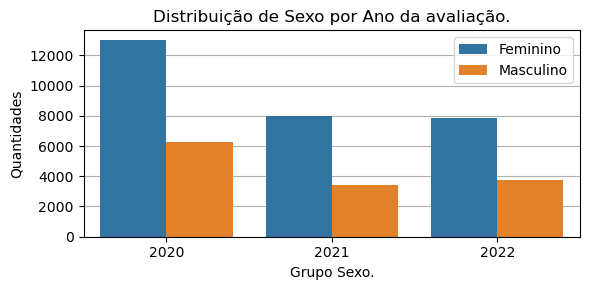

In [7]:
plota('Sexo','Ano da avaliação')

In [8]:
DF['Sexo'].value_counts()

Feminino     28858
Masculino    13451
Name: Sexo, dtype: int64

In [9]:
def nova_var(row):
    if row['TP_PRESENCA_CN'] == 1 and row['TP_PRESENCA_LC'] == 1 and row['TP_PRESENCA_CH'] == 1 and row['TP_PRESENCA_MT'] == 1:
        return 'SIM'
    else:
        return 'NÃO'

DF['Realizou todas as provas'] = DF.apply(nova_var, axis=1)



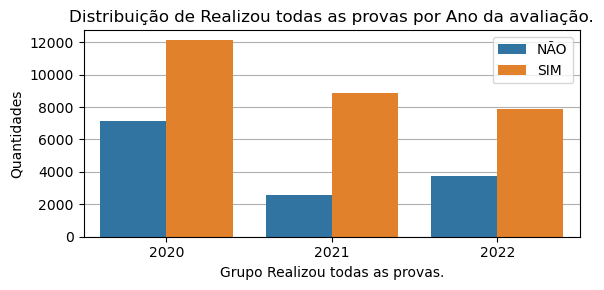

In [10]:
plota('Realizou todas as provas','Ano da avaliação')

In [78]:
DF['Realizou todas as provas'][(DF['Ano da avaliação']==2020) & (DF['Ano da avaliação']==2020 )]

var = 'Realizou todas as provas'
print(DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2020)].value_counts())
print(DF.value_counts(['Realizou todas as provas','Ano da avaliação']))

SIM    12130
Name: Realizou todas as provas, dtype: int64
Realizou todas as provas  Ano da avaliação
SIM                       2020                12130
                          2021                 8871
                          2022                 7866
NÃO                       2020                 7156
                          2022                 3726
                          2021                 2560
dtype: int64


In [102]:
var = 'Realizou todas as provas'

m0=len(DF[DF['Ano da avaliação']==2020])
m1=len(DF[DF['Ano da avaliação']==2021])
m2=len(DF[DF['Ano da avaliação']==2022])
m = len(DF)

dados = {'ano':['2020','2021','2022','total'],
         'Realizou todas as provas': [DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2020)].value_counts()[0],
                                      DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2021)].value_counts()[0],
                                      DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2022)].value_counts()[0],
                                      DF[var][(DF[var] == 'SIM')].value_counts()[0]
                                     ],
         ' % ': [DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2020)].value_counts()[0]/m0*100,
                                      DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2021)].value_counts()[0]/m1*100,
                                      DF[var][(DF[var] == 'SIM')&(DF['Ano da avaliação'] == 2022)].value_counts()[0]/m2*100,
                                      DF[var][(DF[var] == 'SIM')].value_counts()[0]/m*100
                                     ]
}

print(pd.DataFrame(dados).to_latex(index=False,float_format="%0.2f", caption = 'Relação de candidatos que realizaram todas as provas por ano de aplicação'))

\begin{table}
\centering
\caption{Relação de candidatos que realizaram todas as provas por ano de aplicação}
\begin{tabular}{lrr}
\toprule
  ano &  Realizou todas as provas &    \%  \\
\midrule
 2020 &                     12130 & 62.90 \\
 2021 &                      8871 & 77.60 \\
 2022 &                      7866 & 67.86 \\
total &                     28867 & 68.23 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\usuario\AppData\Local\Temp\ipykernel_7468\2333425394.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(dados).to_latex(index=False,float_format="%0.2f", caption = 'Relação de candidatos que realizaram todas as provas por ano de aplicação'))


11592

In [13]:


# Criando um dicionário de mapeamento
mapa_categorias = {
    1: 'Até 18 anos', 2: 'Até 18 anos', 3: 'Até 18 anos', 4: '19 a 25 anos', 5: '19 a 25 anos', 6: '19 a 25 anos',
    7: '19 a 25 anos',
    8: '19 a 25 anos', 9: '19 a 25 anos', 10: '19 a 25 anos', 11: 'Mais de 25 anos', 12: 'Mais de 25 anos', 13: 'Mais de 25 anos',
    14: 'Mais de 25 anos',
    15: 'Mais de 25 anos', 16: 'Mais de 25 anos', 17: 'Mais de 25 anos', 18: 'Mais de 25 anos', 19: 'Mais de 25 anos',
    20: 'Mais de 25 anos'
}

# Aplicando o mapeamento
DF['Grupo Idade'] = DF['TP_FAIXA_ETARIA'].map(mapa_categorias)


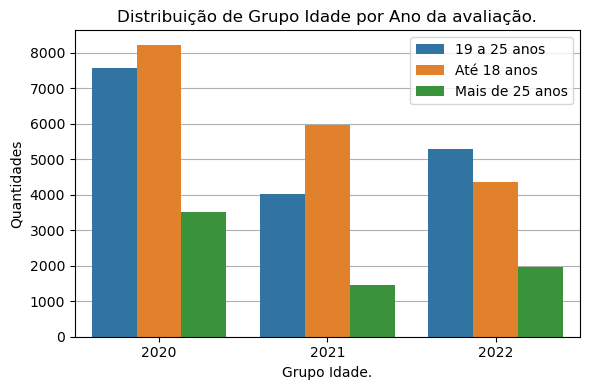

In [14]:
grupo = 'Grupo Idade'
subgrupo = 'Ano da avaliação'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(6,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel(grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


In [115]:
var = 'Grupo Idade'

m0=len(DF[DF['Ano da avaliação']==2020])
m1=len(DF[DF['Ano da avaliação']==2021])
m2=len(DF[DF['Ano da avaliação']==2022])
m = len(DF)

grupos = DF[var].unique()

dados = pd.DataFrame({'Ano':['2020','2021','2022','Total']})

for i in grupos:
    dados[i] = [DF[var][(DF[var] == i)&(DF['Ano da avaliação'] == 2020)].value_counts()[0],
                DF[var][(DF[var] == i)&(DF['Ano da avaliação'] == 2021)].value_counts()[0],
                DF[var][(DF[var] == i)&(DF['Ano da avaliação'] == 2022)].value_counts()[0],
                DF[var][(DF[var] == i)].value_counts()[0]
    ]


print(pd.DataFrame(dados).to_latex(index=False,float_format="%0.2f", caption = 'Relação de candidatos que realizaram todas as provas por ano de aplicação'))



\begin{table}
\centering
\caption{Relação de candidatos que realizaram todas as provas por ano de aplicação}
\begin{tabular}{lrrr}
\toprule
  ano &  Mais de 25 anos &  19 a 25 anos &  Até 18 anos \\
\midrule
 2020 &             3511 &          7561 &         8214 \\
 2021 &             1466 &          4015 &         5950 \\
 2022 &             1951 &          5292 &         4349 \\
total &             6928 &         16868 &        18513 \\
\bottomrule
\end{tabular}
\end{table}



C:\Users\usuario\AppData\Local\Temp\ipykernel_7468\3671969325.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(dados).to_latex(index=False,float_format="%0.2f", caption = 'Relação de candidatos que realizaram todas as provas por ano de aplicação'))


In [117]:
DF['Grupo Idade'].unique()


array(['Mais de 25 anos', '19 a 25 anos', 'Até 18 anos'], dtype=object)

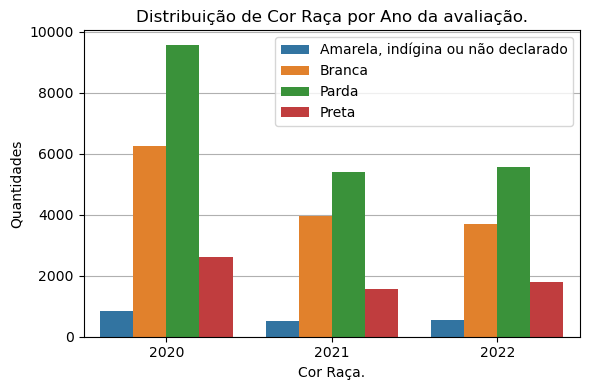

In [16]:
# Criando um dicionário de mapeamento
mapa_categorias = {
    0:'Amarela, indígina ou não declarado',
    1: 'Branca', 
    2: 'Preta', 
    3: 'Parda', 
    4: 'Amarela, indígina ou não declarado', 
    5: 'Amarela, indígina ou não declarado', 
    6: 'Amarela, indígina ou não declarado'
}

# Aplicando o mapeamento
DF['Cor Raça'] = DF['TP_COR_RACA'].map(mapa_categorias)



grupo = 'Cor Raça'
subgrupo = 'Ano da avaliação'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(6,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel(grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


In [17]:
DF['Cor Raça'].value_counts()

Parda                                 20522
Branca                                13889
Preta                                  5958
Amarela, indígina ou não declarado     1940
Name: Cor Raça, dtype: int64

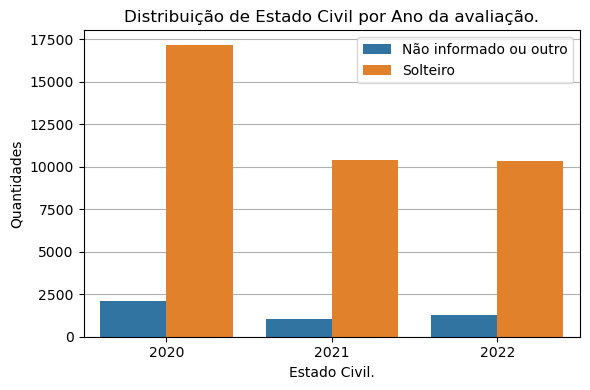

In [18]:
# Criando um dicionário de mapeamento
mapa_categorias = {
    0:'Não informado ou outro',
    1: 'Solteiro', 
    2: 'Não informado ou outro', 
    3: 'Não informado ou outro', 
    4: 'Não informado ou outro'
}

# Aplicando o mapeamento
DF['Estado Civil'] = DF['TP_ESTADO_CIVIL'].map(mapa_categorias)


grupo = 'Estado Civil'
subgrupo = 'Ano da avaliação'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(6,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel(grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


In [19]:
DF['Estado Civil'].value_counts()

Solteiro                  37890
Não informado ou outro     4419
Name: Estado Civil, dtype: int64

In [20]:
print(m)
print()
print(2020)
print(DF[DF['Ano da avaliação']==2020 ]["Estado Civil"].value_counts())

print()
print(2020)
print(DF[DF['Ano da avaliação']==2021 ]["Estado Civil"].value_counts())

print()
print(2020)
print(DF[DF['Ano da avaliação']==2022 ]["Estado Civil"].value_counts())

42309

2020
Solteiro                  17163
Não informado ou outro     2123
Name: Estado Civil, dtype: int64

2020
Solteiro                  10394
Não informado ou outro     1037
Name: Estado Civil, dtype: int64

2020
Solteiro                  10333
Não informado ou outro     1259
Name: Estado Civil, dtype: int64


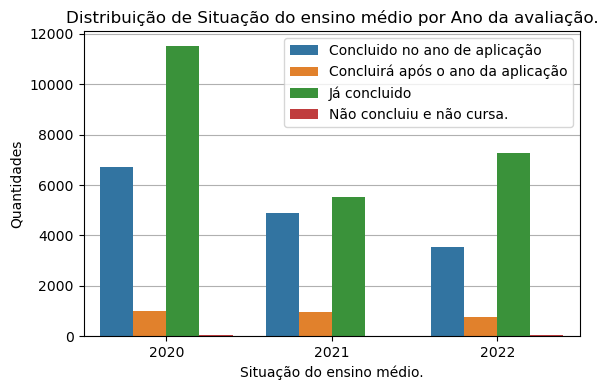

In [21]:
# Criando um dicionário de mapeamento
mapa_categorias = {
    1: 'Já concluido', 
    2: 'Concluido no ano de aplicação', 
    3: 'Concluirá após o ano da aplicação', 
    4: 'Não concluiu e não cursa.'
}

# Aplicando o mapeamento
DF['Situação do ensino médio'] = DF['TP_ST_CONCLUSAO'].map(mapa_categorias)


grupo = 'Situação do ensino médio'
subgrupo = 'Ano da avaliação'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(6,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel(grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


In [22]:
print(m)
print()
print(2020)
print(DF[DF['Ano da avaliação']==2020 ]["Situação do ensino médio"].value_counts())

print()
print(2021)
print(DF[DF['Ano da avaliação']==2021 ]["Situação do ensino médio"].value_counts())

print()
print(2022)
print(DF[DF['Ano da avaliação']==2022 ]["Situação do ensino médio"].value_counts())


42309

2020
Já concluido                         11528
Concluido no ano de aplicação         6699
Concluirá após o ano da aplicação     1004
Não concluiu e não cursa.               55
Name: Situação do ensino médio, dtype: int64

2021
Já concluido                         5529
Concluido no ano de aplicação        4908
Concluirá após o ano da aplicação     969
Não concluiu e não cursa.              25
Name: Situação do ensino médio, dtype: int64

2022
Já concluido                         7265
Concluido no ano de aplicação        3542
Concluirá após o ano da aplicação     747
Não concluiu e não cursa.              38
Name: Situação do ensino médio, dtype: int64


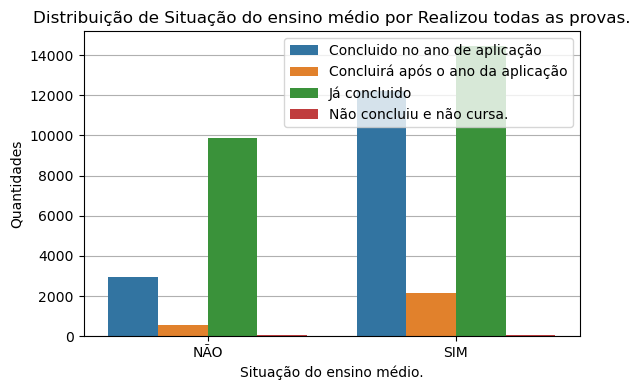

In [23]:


grupo = 'Situação do ensino médio'
subgrupo = 'Realizou todas as provas'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(6,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel(grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


In [24]:
print(m)
print()
print(2020)
print(DF[DF['Ano da avaliação']==2020 ]["Situação do ensino médio"].value_counts())

print()
print(2021)
print(DF[DF['Ano da avaliação']==2021 ]["Situação do ensino médio"].value_counts())

print()
print(2022)
print(DF[DF['Ano da avaliação']==2022 ]["Situação do ensino médio"].value_counts())


42309

2020
Já concluido                         11528
Concluido no ano de aplicação         6699
Concluirá após o ano da aplicação     1004
Não concluiu e não cursa.               55
Name: Situação do ensino médio, dtype: int64

2021
Já concluido                         5529
Concluido no ano de aplicação        4908
Concluirá após o ano da aplicação     969
Não concluiu e não cursa.              25
Name: Situação do ensino médio, dtype: int64

2022
Já concluido                         7265
Concluido no ano de aplicação        3542
Concluirá após o ano da aplicação     747
Não concluiu e não cursa.              38
Name: Situação do ensino médio, dtype: int64


In [25]:
#'Já concluido', 
#'Concluido no ano de aplicação', 
#'Concluirá após o ano da aplicação', 
#'Não concluiu e não cursa.

print('Concluido no ano de aplicação',  ((DF['Situação do ensino médio']=='Concluido no ano de aplicação')==(DF['Realizou todas as provas']=='SIM')).value_counts()/m)
print('Concluirá após o ano da aplicação',  ((DF['Situação do ensino médio']=='Concluirá após o ano da aplicação')==(DF['Realizou todas as provas']=='SIM')).value_counts()/m)
print('Já concluido',  ((DF['Situação do ensino médio']=='Já concluido')==(DF['Realizou todas as provas']=='SIM')).value_counts()/m)
print('Não concluiu e não cursa.',  ((DF['Situação do ensino médio']=='Não concluiu e não cursa.')==(DF['Realizou todas as provas']=='SIM')).value_counts()/m)


Concluido no ano de aplicação True     0.536222
False    0.463778
dtype: float64
Concluirá após o ano da aplicação False    0.644804
True     0.355196
dtype: float64
Já concluido False    0.573519
True     0.426481
dtype: float64
Não concluiu e não cursa. False    0.682479
True     0.317521
dtype: float64


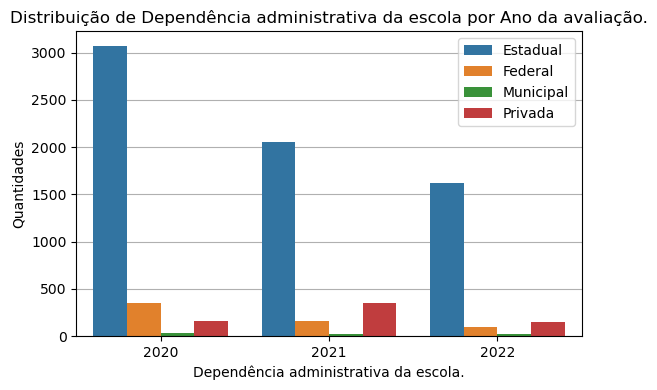

In [26]:
# Criando um dicionário de mapeamento
mapa_categorias = {
    1: 'Federal', 
    2: 'Estadual', 
    3: 'Municipal', 
    4: 'Privada'
}

# Aplicando o mapeamento
DF['Dependência administrativa da escola'] = DF['TP_DEPENDENCIA_ADM_ESC'].map(mapa_categorias)


grupo = 'Dependência administrativa da escola'
subgrupo = 'Ano da avaliação'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(6,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel(grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


In [118]:
S = pd.qcut( (DF["NU_NOTA_CN"]+DF["NU_NOTA_LC"]+DF["NU_NOTA_CH"]+DF["NU_NOTA_MT"]+DF["NU_NOTA_REDACAO"])/5, q=6).value_counts().sort_index()
qins = [0, S.index[1].left, S.index[2].left, S.index[3].left,S.index[4].left,S.index[5].left, 1000]


DF["qut_MT"] = pd.cut( DF["NU_NOTA_MT"], bins = qins, labels= False)
DF["qut_LC"] = pd.cut( DF["NU_NOTA_LC"], bins = qins, labels= False)
DF["qut_CN"] = pd.cut( DF["NU_NOTA_CN"], bins = qins, labels= False)
DF["qut_CH"] = pd.cut( DF["NU_NOTA_CH"], bins = qins, labels= False)
DF["qut_RE"] = pd.cut( DF["NU_NOTA_REDACAO"], bins = qins, labels= False)
DF["qut_OB"] = pd.cut( (DF["NU_NOTA_CN"]+DF["NU_NOTA_LC"]+DF["NU_NOTA_CH"]+DF["NU_NOTA_MT"])/4, bins = qins, labels= False)
DF["qut_GE"] = pd.cut( (DF["NU_NOTA_CN"]+DF["NU_NOTA_LC"]+DF["NU_NOTA_CH"]+DF["NU_NOTA_MT"]+DF["NU_NOTA_REDACAO"])/5, bins = qins, labels= False)



DF['CH'] = pd.cut( DF['NU_NOTA_CH'], bins = 5, labels= False)
DF['CN'] = pd.cut( DF['NU_NOTA_CN'], bins = 5, labels= False)
DF['LC'] = pd.cut( DF['NU_NOTA_LC'], bins = 5, labels= False)
DF['MT'] = pd.cut( DF['NU_NOTA_MT'], bins = 5, labels= False)
DF['REDACAO'] = pd.cut( DF['NU_NOTA_REDACAO'], bins = 5, labels= False)
DF['Total'] = DF['NU_NOTA_CH']+DF['NU_NOTA_CN']+DF['NU_NOTA_LC']+DF['NU_NOTA_MT']
DF['CAT_TOTAL'] = pd.cut( DF['Total'], bins = 5, labels= False)


In [126]:
# Criando um dicionário de mapeamento
mapa_categorias = {
    0: 'Muito ruim', 
    1: 'Ruim', 
    2: 'Médio', 
    3: 'Bom',
    4: 'Muito bom'
}

# Aplicando o mapeamento
DF['Desempenho'] = DF['CAT_TOTAL'].map(mapa_categorias)

In [127]:
pd.cut( DF['Total']/4, bins = 5).value_counts()

(440.64, 565.41]     17457
(565.41, 690.18]      6052
(315.87, 440.64]      4873
(690.18, 814.95]       470
(190.476, 315.87]       15
Name: Total, dtype: int64

<Axes: >

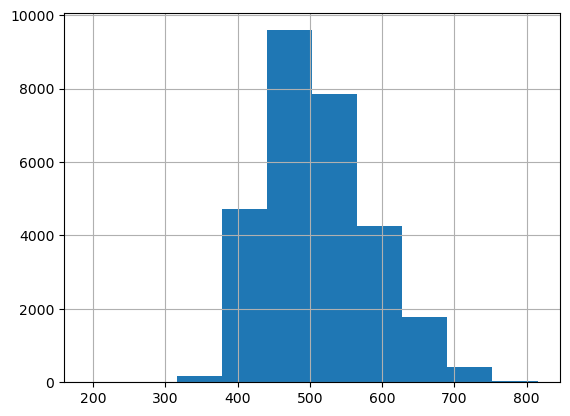

In [128]:
(DF['Total']/4).hist()

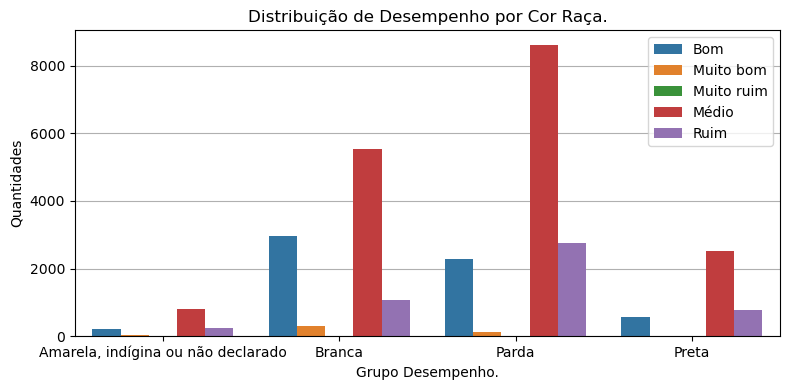

In [129]:



grupo = 'Desempenho'
subgrupo = 'Cor Raça'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel('Grupo '+grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


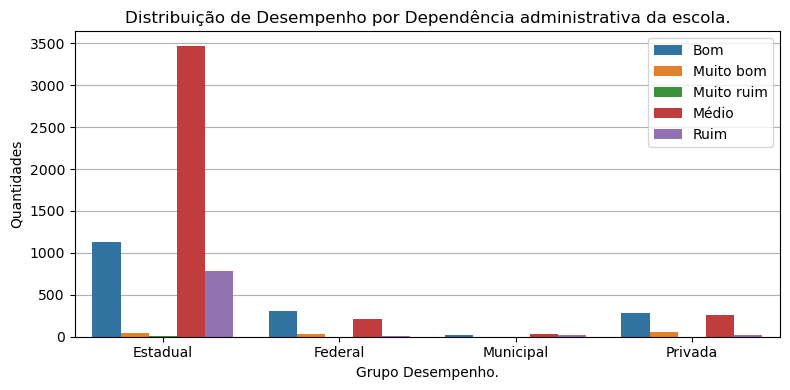

In [130]:

grupo = 'Desempenho'
subgrupo = 'Dependência administrativa da escola'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel('Grupo '+grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()


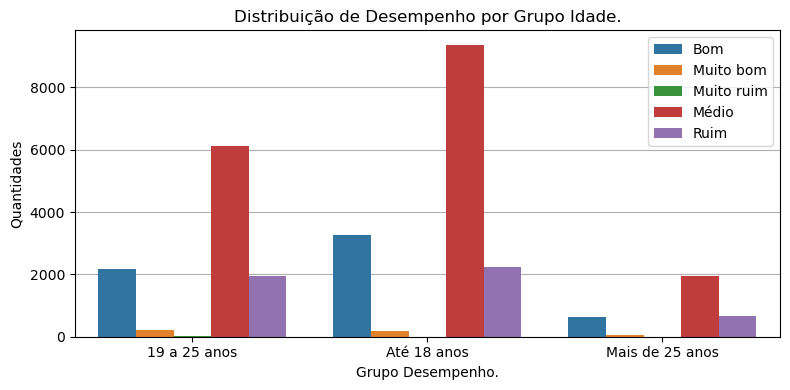

In [131]:

grupo = 'Desempenho'
subgrupo = 'Grupo Idade'

# Cria um DataFrame com a contagem de cada combinação de grupo e subgrupo.
df_contagem = DF.groupby([grupo, subgrupo]).size().reset_index(name='contagem')

# Cria a figura e o objeto de eixos, especificando o tamanho da figura.
fig, ax = plt.subplots(figsize=(8,4))

# Cria o gráfico de barras.
sns.barplot(x=subgrupo, y='contagem', hue=grupo, data=df_contagem, ax=ax)

plt.title('Distribuição de '+ grupo+' por '+subgrupo+'.')
plt.xlabel('Grupo '+grupo+'.')
plt.ylabel('Quantidades')

plt.xticks(rotation=0)  # Adiciona rotação de 45 graus às etiquetas do eixo x

plt.tight_layout()  # Ajusta o layout para acomodar as etiquetas do eixo

plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.legend(loc='upper right')

plt.show()
